In [1]:
"""
   Copyright (C) 2023 ETH Zurich. All rights reserved.
   Author: Sergei Vostrikov, ETH Zurich
           Cédric Hirschi, ETH Zurich
   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at
       http://www.apache.org/licenses/LICENSE-2.0
   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

   SPDX-License-Identifier: Apache-2.0
"""

'\n   Copyright (C) 2023 ETH Zurich. All rights reserved.\n   Author: Sergei Vostrikov, ETH Zurich\n           Cédric Hirschi, ETH Zurich\n   Licensed under the Apache License, Version 2.0 (the "License");\n   you may not use this file except in compliance with the License.\n   You may obtain a copy of the License at\n       http://www.apache.org/licenses/LICENSE-2.0\n   Unless required by applicable law or agreed to in writing, software\n   distributed under the License is distributed on an "AS IS" BASIS,\n   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.\n   See the License for the specific language governing permissions and\n   limitations under the License.\n\n   SPDX-License-Identifier: Apache-2.0\n'

# If you are not familiar with Jupyter Notebooks, please first check online tutorials such as https://realpython.com/jupyter-notebook-introduction/#creating-a-notebook

In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

### Test of Matplotlib Widget Backend

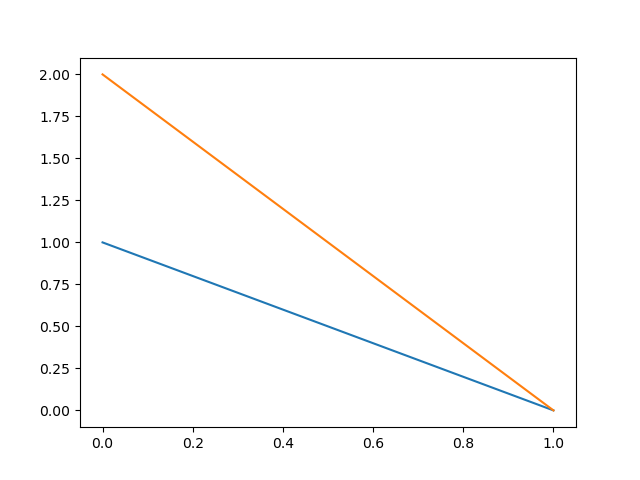

No such comm: 26beffac464c4ff1a74c0759b967b425


In [3]:
import matplotlib.pyplot as plt

plt.plot([[1, 2], [0, 0]])

#### If you do not see a figure above,  try to restart the kernel.
#### If it does not help, check the installation of **ipympl** library.

## Run WULPUS GUI Demo

## Prepare TX/RX configurations for HW

In [4]:
# from wulpus.rx_tx_conf import WulpusRxTxConfigGen
import wulpus.rx_tx_conf_gui as conf_gui

# # Generate Transmit/Receive configs
# conf_gen = WulpusRxTxConfigGen()

# Generate Transmit/Receive configs using the GUI
conf_gen = conf_gui.WulpusRxTxConfigGenGUI()

display(conf_gen)

WulpusRxTxConfigGenGUI(children=(HBox(children=(Dropdown(description='Config:', options=(0, 1, 2, 3, 4, 5, 6, …

In [5]:
from wulpus.uss_conf import WulpusUssConfig, PGA_GAIN
from wulpus.uss_conf_gui import WulpusUssConfigGUI

# # TX and RX active channels IDs (only when not using the GUI)
# conf_gen.add_config([7], [7])
# conf_gen.add_config([0], [6])

# # load configurations from the GUI
# tx_confs = conf_gen.get_tx_configs()
# rx_confs = conf_gen.get_rx_configs()

# # load configurations directly from a file
# tx_confs = conf_gen.with_file("tx_rx_configs.json").get_tx_configs()
# rx_confs = conf_gen.with_file("tx_rx_configs.json").get_rx_configs()

# load b-mode configurations from a file
tx_confs = conf_gen.with_file("bmode_configs.json").get_tx_configs()
rx_confs = conf_gen.with_file("bmode_configs.json").get_rx_configs()

print('TX config: ', np.binary_repr(tx_confs[0]))
print('RX config: ', np.binary_repr(rx_confs[0]))

# Create US subsystem configuration
uss_conf = WulpusUssConfig(num_acqs=100,
                           dcdc_turnon=80,
                           start_hvmuxrx=500,
                            meas_period=321965,
                            num_txrx_configs=len(tx_confs),
                            tx_configs=tx_confs,
                            rx_configs=rx_confs,
                            rx_gain=PGA_GAIN[-10])

# Modify US subsystem configuration using the GUI
uss_conf = WulpusUssConfigGUI(uss_conf)

print("Gain dB: ", uss_conf.rx_gain)

display(uss_conf)

TX config:  10
RX config:  1
Gain dB:  23.6


WulpusUssConfigGUI(children=(HBox(children=(VBox(children=(BoundedIntText(value=80, description='DC-DC turn on…

### Run GUI 
(Check sw/docs/gui_overview.pdf for more information)

WulpusGuiSingleCh(children=(VBox(children=(HBox(children=(VBox(children=(Checkbox(value=True, description='Sho…

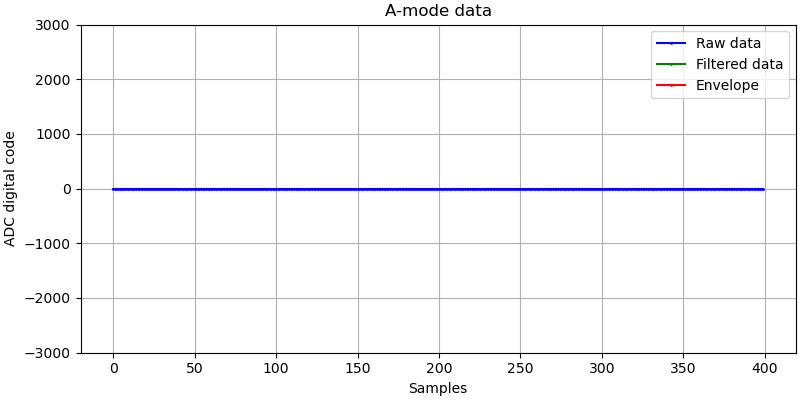

IndexError: list index out of range

In [6]:
%matplotlib widget
from wulpus.gui import WulpusGuiSingleCh
from wulpus.dongle import WulpusDongle

# Create a dongle object
dongle = WulpusDongle()

# Create a GUI
gui = WulpusGuiSingleCh(dongle, uss_conf, max_vis_fps = 5)

display(gui)